# Exercice 1 : Régression

On mesure simultanément le courant et l'intensité aux bornes d'une résistance. On obtient les
valeurs :

$$\begin{aligned}
\text{intensité en ampères} && 0.053 && 0.067 && 0.095 && 0.16 && 0.21 \\ \hline
\text{tension en volts} && 8.1 && 9.95  &&  15  &&  25 && 30 \\ \hline
\end{aligned}
$$

## Question (a)

> Déterminer la moyenne, la variance, et l'écart-type des séries statistiques 
>`l_x=[0.053,...]`  et  `l_y=[8.1,...]` en utilisant
>les commandes Python  `mean()` et `var()` de la bibliothèque numpy.   
>Déterminer l'écart-type de `l_x` et de `l_y`.

In [1]:
from numpy import *

l_x = [0.053, 0.067, 0.095, 0.16, 0.21]
l_y = [8.1, 9.95, 15, 25, 30]
m_x = mean(l_x)
print(f"Moyenne de x: {m_x:.3f}")
var_x = var(l_x)
print(f"Variance de x: {var_x:.3f}")
sigma_x = sqrt(var_x)
print(f"L'écart-type de x: {sigma_x:.3f}")
m_y = mean(l_y)
print(f"Moyenne de y: {m_y:.3f}")
var_y = var(l_y)
print(f"Variance de y: {var_y:.3f}")
sigma_y = sqrt(var_y)
print(f"L'écart-type de y: {sigma_y:.3f}")

Moyenne de x: 0.117
Variance de x: 0.004
L'écart-type de x: 0.059
Moyenne de y: 17.610
Variance de y: 72.810
L'écart-type de y: 8.533


## Question (b)

>Écrire une fonction `ma_covariance(l_c, l_d)` qui a pour paramètre d'entrée deux listes 
>(de même longueur) `l_c` et  `l_d`
>et qui retourne la covariance de `(l_c, l_d)`. Utiliser cette fonction pour déterminer la covariance 
>de la série statistique double `(l_x, l_y)`.

In [2]:
def ma_covariance(l_c, l_d):
    n = len(l_c)
    somme = sum([c*d for (c,d) in zip(l_c, l_d)])
    covariance = 1/n*somme - mean(l_c)*mean(l_d)
    return covariance

In [3]:
cov_xy = ma_covariance(l_x, l_y)
print(f"Covariance: {cov_xy:.3f}")

Covariance: 0.504


In [4]:
def ma_covariance_bis(l_c, l_d):
    n = len(l_c)
    somme = sum([l_c[i] * l_d[i] for i in range(n)])
    covariance = 1/n*somme - mean(l_c)*mean(l_d)
    return covariance

In [5]:
cov_xy = ma_covariance_bis(l_x, l_y)
print(f"Covariance: {cov_xy:.3f}")

Covariance: 0.504


In [6]:
def ma_covariance_ter(l_c, l_d):
    n = len(l_c) # len(l_c) est le nombre d'éléments dans l_c
    somme = 0 
    for i in range(n): 
        somme = somme + l_c[i]*l_d[i]
    somme = sum([l_c[i] * l_d[i] for i in range(n)])
    covariance = 1/n*somme - mean(l_c)*mean(l_d)
    return covariance

In [7]:
cov_xy = ma_covariance_ter(l_x, l_y)
print(f"Covariance: {cov_xy:.3f}")

Covariance: 0.504


## Question (c)

>Déterminer le coefficient de corrélation $r$ ainsi que le coefficient directeur $a$ et 
>l'ordonnée à l'origine $b$ de 
>la droite de r\'egression affine $z=ax+b$ de la série statistique double `(l_x, l_y)`.

In [8]:
r = cov_xy/(sigma_x*sigma_y)
print(f"Coefficient de corrélation: {r:.3f}")
a = cov_xy/var_x
b = m_y - a*m_x
print(f"droite de régression est z = {a:.3f}x+{b:.3f}")

Coefficient de corrélation: 0.996
droite de régression est z = 143.310x+0.843


## Question (d)

>Représenter graphiquement les donnés par un nuage de points et rajouter la droite de régression 
>dans le même graphique.

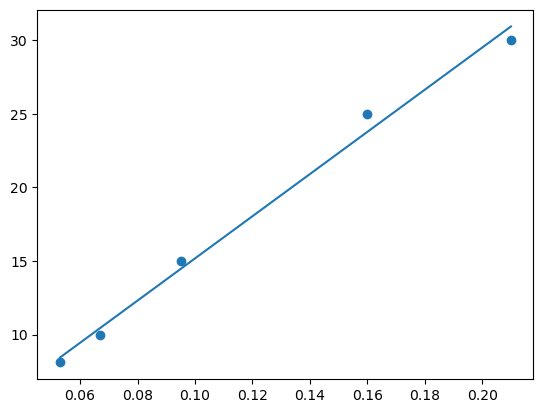

In [9]:
from matplotlib.pyplot import *
scatter(l_x, l_y)
l_z = [a*x+b for x in l_x]
plot(l_x, l_z)
show()

# Exercice 2

## Question (a)

> Pour `sigma=0.3`, déterminer le coefficient de corrélation $r$ ainsi que l'équation 
de la droite de régression de la série statistique double
`(l_x, l_y) = donnees(sigma)` et représenter dans le même graphique le nuage de points 
et la droite de régression comme vous l'avez fait pour 
l'exercice précédent. Améliorer le graphique avec des options.

Moyenne de x: 49.500
Variance de x: 833.250
L'écart-type de x: 28.866
Moyenne de y: 8.468
Variance de y: 2.102
L'écart-type de y: 1.450
Covariance: 41.760
Coefficient de corrélation: 0.998
droite de régression est z = 0.050x+5.987


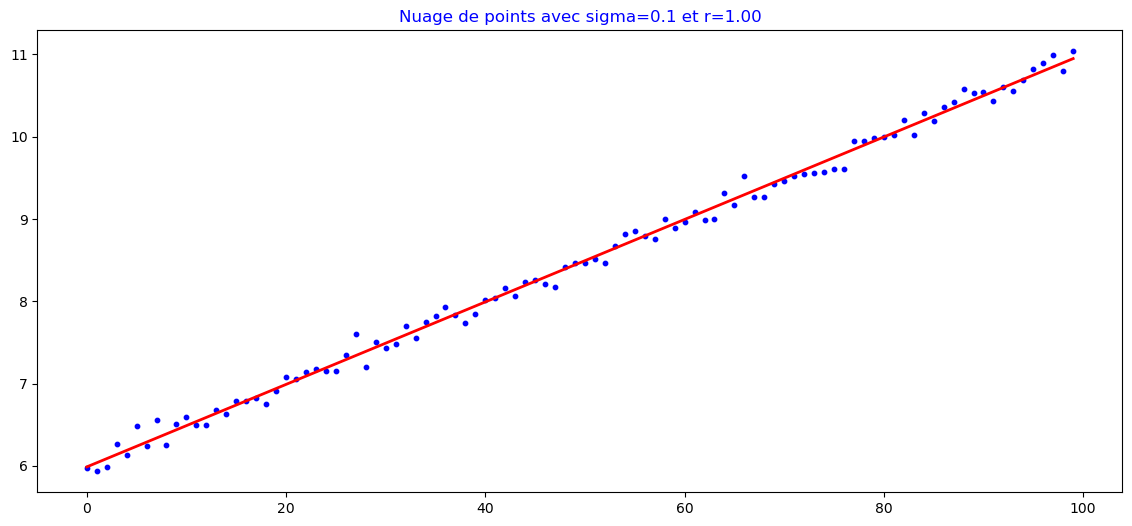

In [10]:
from numpy import *
from matplotlib.pyplot import *

def donnees(sigma):
    n = 100
    l_x = list(range(n))  # l_x = [0,1,....,99]
    l_bruit = random.normal(loc=2, scale=sigma, size=100)
    l_y = [0.05*l_x[i] + 4 + l_bruit[i] for i in range(n)]
    return l_x, l_y

def ma_covariance(l_c, l_d):
    n = len(l_c)
    somme = sum([c*d for (c,d) in zip(l_c, l_d)])
    covariance = 1/n*somme - mean(l_c)*mean(l_d)
    return covariance

sigma = 0.1
l_x, l_y = donnees(sigma)
    
m_x = mean(l_x)
print(f"Moyenne de x: {m_x:.3f}")
var_x = var(l_x)
print(f"Variance de x: {var_x:.3f}")
sigma_x = sqrt(var_x)
print(f"L'écart-type de x: {sigma_x:.3f}")
m_y = mean(l_y)
print(f"Moyenne de y: {m_y:.3f}")
var_y = var(l_y)
print(f"Variance de y: {var_y:.3f}")
sigma_y = sqrt(var_y)
print(f"L'écart-type de y: {sigma_y:.3f}")

cov_xy = ma_covariance(l_x, l_y)
print(f"Covariance: {cov_xy:.3f}")

r = cov_xy/(sigma_x*sigma_y)
print(f"Coefficient de corrélation: {r:.3f}")
a = cov_xy/var_x
b = m_y - a*m_x
print(f"droite de régression est z = {a:.3f}x+{b:.3f}")


figure(figsize=(14, 6))
title(f'regression linéaire de données avec bruit avec sigma={sigma} et r={r:.1f}', color='blue', fontsize='14')
scatter(l_x, l_y, s=10, color="blue")
l_z = [a*x+b for x in l_x]
plot(l_x, l_z, color="red", linewidth=2)
title(f"Nuage de points avec sigma={sigma} et r={r:.2f}")
show()

## Question (b)

> Exécuter le code pour `sigma=5`, `sigma=1`, `sigma=0.1` et décrire comment l'alignement du nuage de points et le coefficient de corrélation varient pour les différentes valeurs de `sigma` et donner une explication pour ce comportement.

### Solution

- Plus `sigma` est petit, plus le nuage de points est proche de la droite de régression. C'est prévisible, car plus `sigma` est petit, moins les données sont dispersées autour de la moyenne, donc moins il y a du "bruit". Plus les données sont alignés, plus `r` est proche de $\pm 1$.
- Au contraire, plus `sigma` est grand, plus il y a dispersion autour de la moyenne, donc le nuage de points est moins bien aligné et `r` est plus proche de $0$.

# Exercice 3

 On considère l'expérience aléatoire $E$ qui consiste à lancer un dé équilibré jusqu'à 
l'obtention du premier $6$. On note par $X$ la variable aléatoire qui prend comme valeur le rang du premier $6$.

## Question (a)

>Donner le nom et la valeur du paramètre de la loi de $X$? 
>Donner l'espérance et la variance de $X$ (formule et valeur exacte).

### Solution:
    
$X$ suit une loi géométrique de paramètre $p=1/6$.

$$\mathbb{E}(X) = \frac{1}{p}=6~~~ \mathbb{V}(X) = \frac{1-p}{p^2}=30$$  

## Questions (b), (c)

>Écrire une fonction `premier_succes()` qui n'a aucun paramètre d'entrée
>et qui fait une simulation du lancer d'un dé jusqu'à l'obtention du premier $6$. Elle retourne
>le rang du premier $6$.

>Écrire une fonction `moyenne_premier_succes(nb_essai)`
>qui simule `nb_essai` fois l'expérience $E$
>et qui retourne la moyenne des valeurs obtenues. 
>Exécuter la fonction avec `nb_essai=100`. 

In [11]:
from numpy import *
from matplotlib.pyplot import *

def premier_succes():
    rang = 1
    while random.randint(1, 7) != 6:
        rang += 1
    return rang

def moyenne_premier_succes(nb_essai):
    S = 0
    for _ in range(nb_essai):
        S += premier_succes()
    return  S/nb_essai
    
nb_essai = 100
moy = moyenne_premier_succes(nb_essai)
print(f"La moyenne pour {nb_essai} tentatives est {moy}")
nb_essai = 100000
moy = moyenne_premier_succes(nb_essai)
print(f"La moyenne pour {nb_essai} tentatives est {moy}")

La moyenne pour 100 tentatives est 4.98
La moyenne pour 100000 tentatives est 6.01332


## Question (d)

>Augmenter la valeur de `nb_essai` et expliquer en citant un théorème du cours pourquoi on 
>trouve une moyenne proche de $6$. Faites une capture d'écran du script et 
>une capture d'une exécution pour une valeur de `nb_essai` bien choisie.

### Solution:
    
- La loi des grands nombres dit que la moyenne observée tend (dans un certain sens) vers l'espérance qui est $6$ pour notre cas.

# Exercice 4

Si on répète $n$ fois l'expérience $E$ de l'exercice précédentet si on note pour $i=1,\ldots, n$ 
par $X_i$ le rang du premier succès de la $i$-ème expérience, alors chaque $X_i$ suit la même loi que la variable aléatoire $X$
de l'exercice précédent. 

Le théorème limite central dit que la loi de la variable aléatoire $\overline{X} _n=\frac{X_1+\cdots X_n}{n}$
 peut être approximée par une loi normale.


## Question (a)

>Déterminer la moyenne, la variance et l'écart-type de cette loi normale un utilisant les formules
>appropriées du polycopié de cours. Donner des valeurs approchées en utilisant Python.

### Solution

- Les variables aléatoires $X_i$ sont indépendantes et suivent la même loi géométrique de paramètre $p=1/6$. Nous avons vu pour l'exercice précédent que leur moyenne est $\mu=6$ et leur variance est $\sigma^2=30$.
- Le théorème central limite dit que $\overline{X} _n=\frac{X_1+\cdots X_n}{n}$ peut être approximé
par la loi normale $\cal{N}(\mu, \frac{\sigma^2}{n})$. Donc la moyenne de la loi normale est $\mu=6$,
la variance est $\frac{\sigma^2}{n}=\frac{30}{n}$ et l'écart est $\frac{\sqrt{30}}{\sqrt{n}}$

## Questions (b) à (d)

> - Pour `nb_essai=100`, exécuter `nb_moyennes=10` fois
> la fonction `moyenne_premier_succes(nb_essai)` et stocker les `nb_moyennes`
>moyennes que cette fonction retourne dans une liste `liste_moyennes`.    
> - Si votre script fonctionne, exécuter-le pour `nb_moyennes = 1000` 
>et représenter les moyennes par un histogramme.   
> - Rajouter la courbe de la loi normale de la question (a) à l'histogramme.   
> Améliorer le graphique avec un titre ainsi qu'une description de l'axe des abscisses et 
> augmenter la valeur de `nb_moyennes`.


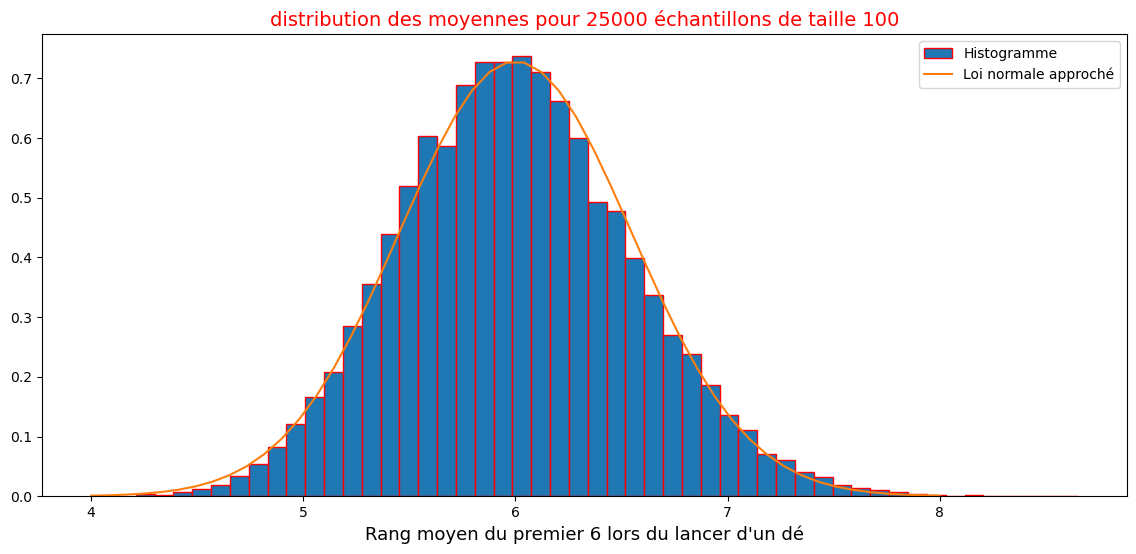

In [12]:
from numpy import *
from matplotlib.pyplot import *
from scipy import stats

def premier_succes():
    rang = 1
    while random.randint(1, 7) != 6:
        rang += 1
    return rang

def moyenne_premier_succes(nb_essai):
    S = 0
    for _ in range(nb_essai):
        S += premier_succes()
    return  S/nb_essai

nb_moyennes = 25000
nb_essai = 100

moyennes = []
for _ in range(nb_moyennes):
    moyenne = moyenne_premier_succes(nb_essai)
    moyennes.append(moyenne)

#print(moyennes)

figure(figsize=(14, 6))
hist(moyennes,  
     bins = 50, # on regroupe les donnés en 20 classes, on a donc 20 rectangles
     density = True, # on affiche les fréquences, pas les effectifs
     edgecolor = "red",
     label = "Histogramme" # pas demandé
     )
title(f'distribution des moyennes pour {nb_moyennes} échantillons de taille {nb_essai}', 
      color='red', fontsize=14)


mu = 6
sigma = sqrt(30/nb_essai)

def f(x):
    y = stats.norm.pdf(x, loc=mu, scale=sigma)
    return y

L_x = linspace(4, 8)
L_y = [f(x) for x in L_x]
xlabel("Rang moyen du premier 6 lors du lancer d'un dé", fontsize=13)
plot(L_x, L_y, label="Loi normale approché") # label pas demandé
legend() # pas demandé
show()

# Exercice 5

Pour cet exercice, nous faisons plusieurs simulations pour l'exercice 4.1 de la feuille de TD.  
Une machine d'une entreprise produit des cylindres dont l'alésage peut être réglé. La précision de fabrication
est telle que l'écart-type de l'alésage est de $13\cdot 10^{-4}$mm.
La chef d'atelier Margo a réglé la machine 
pour qu'elle produise des cylindres pour un alésage de $82.7$mm. Elle vous demande de vérifier si le réglage donne le bon résultat. 
Vous allez donc déterminer un intervalle de confiance pour l'alésage moyen pour un échantillon de
taille $200$.  
Le but de l'exercice est de voir ce que donne (en moyenne) un intervalle de confiance pour une machine qui est bien réglée.

## Question (a) et (b)

> - Écrire une fonction `interval_confiance(echantillon)` qui
>prend comme argument une liste de valeurs (de taille arbitraire) et qui retourne les bornes de 
>l'intervalle de confiance de probabilité de confiance
>$1-\alpha = 0.95$.   
>Pour tester votre script, simuler le prélèvement d'un échantillon de taille `taille_echantillon=200` 
>et déterminer les bornes de l'intervalle de confiance correspondant.   
> - En répétant les instructions de la question précédente, simulez le prélèvement
>de `nb_echantillons = 100` échantillons de taille
>`taille_echantillon=200` et déterminer le pourcentage de "bons" intervalles de confiance, 
>donc ceux qui contiennent la moyenne (théorique) $82.7$.   
> En augmentant `nb_echantillons`, le pourcentage de "bons" intervalles 
> semble s'approcher de quelle valeur ? Expliquer pourquoi.

In [13]:
from numpy import *
from matplotlib.pyplot import *
from numpy import *

def machine(nb_cylindres):
    X = random.normal(loc=82.7, scale=13E-4, size=nb_cylindres)
    return X

def interval_confiance(echantillon):
    n = len(echantillon)
    moyenne = mean(echantillon)
    b1 = moyenne - 1.96*13E-4/sqrt(n)
    b2 = moyenne + 1.96*13E-4/sqrt(n)
    return b1, b2

taille_echantillon = 200
echantillon = machine(taille_echantillon)
b1, b2 = interval_confiance(echantillon)
print(f"Intervalle de confiance : [{b1:.4f}, {b2:.4f}]")

mu = 82.7
nb_echantillons = 10000
nb_bons_intervalles = 0
for i in range(nb_echantillons):
    echantillon = machine(taille_echantillon)
    b1, b2 = interval_confiance(echantillon)
    if b1 <= mu <= b2:
        nb_bons_intervalles += 1
f = nb_bons_intervalles/nb_echantillons # pourcentage de bons intervalles
        
print(f'Le pourcentage de "bons" intervalles est {f}')

Intervalle de confiance : [82.6997, 82.7001]
Le pourcentage de "bons" intervalles est 0.9523


# Exercice 6

> Simuler comme pour l'exercice précédent `nb_echantillons=100` fois le prélèvement d'un échantillon de taille
> `taille_echantillon=200`. Mais au lieu de compter le pourcentage de "bons" intervalles,
> représenter  dans le même graphique les "bons" et "mauvaises" intervalles par des segments verticaux
> de couleurs différentes.    
> Rajoutez la droite horizontale d'équation $y=82.7$.

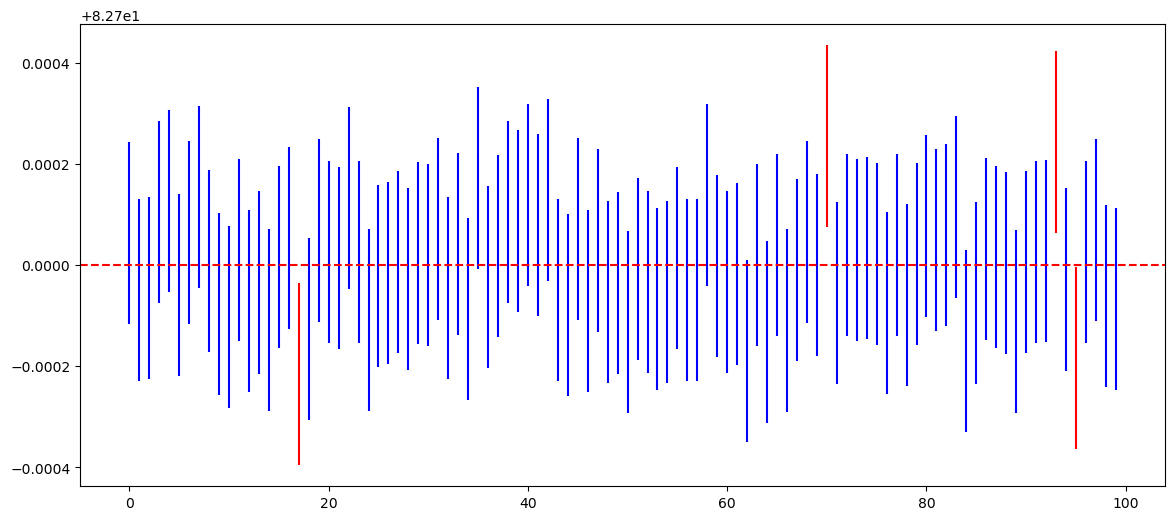

In [14]:
from numpy import *
from matplotlib.pyplot import *
from numpy import *

def machine(nb_cylindres):
    X = random.normal(loc=82.7, scale=13E-4, size=nb_cylindres)
    return X

def interval_confiance(echantillon):
    n = len(echantillon)
    moyenne = mean(echantillon)
    b1 = moyenne - 1.96*13E-4/sqrt(n)
    b2 = moyenne + 1.96*13E-4/sqrt(n)
    return b1, b2

taille_echantillon = 200
nb_echantillons = 100

figure(figsize=(14,6))

for i in range(nb_echantillons):
    echantillon = machine(taille_echantillon)
    b1, b2 = interval_confiance(echantillon)
    if b1 <= mu <= b2:
        vlines(x=i, ymin=b1, ymax=b2, color="blue")
    else:
        vlines(x=i, ymin=b1, ymax=b2, color="red")

axhline(y=82.7, color='red', linestyle="--")
show()

# Exercice 7

Une femme ivre doit longer la rive d'un fleuve pour son chemin de retour. Au début 
elle se trouve à 1m de la rive qui est à sa droite, mais à chaque pas, elle dévie à droite ou à gauche 
de $40$cm d'une façon aléatoire.

## Question (a)

> Ecrire un script pour construire la liste  de ses positions (déviations totales) successives qu'on nomme >`trajectoire` qui se termine dès que la dernière position est $+3$.  
>Faites une représentation graphique de la trajectoire avec la commande 
>`plot(trajectoire, "-o")`.

4


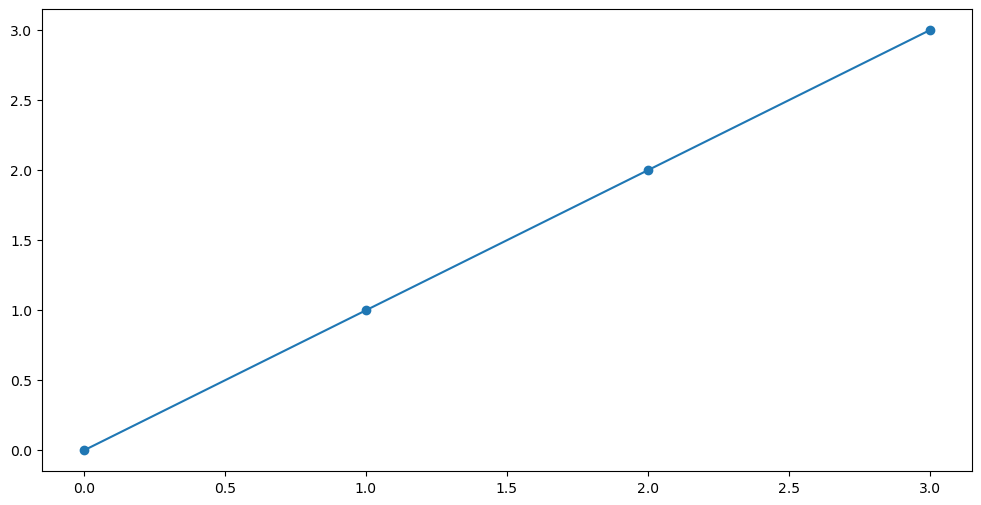

In [15]:
from numpy import *
from matplotlib.pyplot import *

#import random
#random.seed(11) # choix aléatoire tel que len(trajectoire) = 3
#random.seed(56) # choix aléatoire tel que len(trajectoire) = 5.254.902

trajectoire = [0]
position = 0
while position != 3:
    position += random.choice([-1,1])
    trajectoire.append(position)
print(len(trajectoire))

figure(figsize=(12,6))
plot(trajectoire, '-o')
show()

## Question (b)

Nous supposons maintenant que la rive a une longueur de `longueur_rive` pas.

> Dans un nouveau script, écrire une fonction `tomber_eau(longueur_rive)` qui retourne $1$ 
> si la femme tombe dans l'eau et $0$ si elle réussit à quitter la rive sans se mouiller. 
> Pour `longueur_rive=15`, exécuter cette fonction `nb_trajectoires = 1000` fois et
> déterminer le pourcentage de trajectoires ou la femme tombe dans l'eau. 

In [16]:
from numpy import *

def tomber_eau(longueur_rive):
    position = 0
    for i in range(longueur_rive):
        position += random.choice([-1,1])
        if position == 3:
            return 1
    return 0
        
longueur_rive = 15
nb_trajectoires = 30000
nb_tomber_eau = 0
for _ in range(nb_trajectoires):
    nb_tomber_eau += tomber_eau(longueur_rive)
frequence_tombeau_eau = nb_tomber_eau/nb_trajectoires
print(f"La probabilité de tomber à l'eau est {frequence_tombeau_eau:.3f}")

La probabilité de tomber à l'eau est 0.452


## Question (c)

> - Adapter la fonction `tomber_eau(longueur_rive)` afin qu'elle retourne
> le nombre de pas que la femme a fait jusqu'à ce qu'elle tombe dans l'eau, et $0$ sinon.  
> - Exécuter cette fonction `nb_trajectoires = 1000` fois pour `longueur_rive=15`,  
> et créer une liste `l_y` dont le premier élément est le nombre de fois
> que la femme n'est pas tombé dans l'eau, et le $k$-ème élément est le nombre
> de fois que la femme est tombé dans l'eau après $k$ pas, pour $k=1,2,\ldots$.   
> - Transformer la liste des effectifs `l_y` en une liste de fréquences `l_f` que vous 
> représenterez par un diagramme en bâtons:
> - Augmenter `nb_trajectoires`.

[0.54665, 0.0, 0.0, 0.1249, 0.0, 0.0934, 0.0, 0.0695, 0.0, 0.05715, 0.0, 0.0456, 0.0, 0.0343, 0.0, 0.0285]


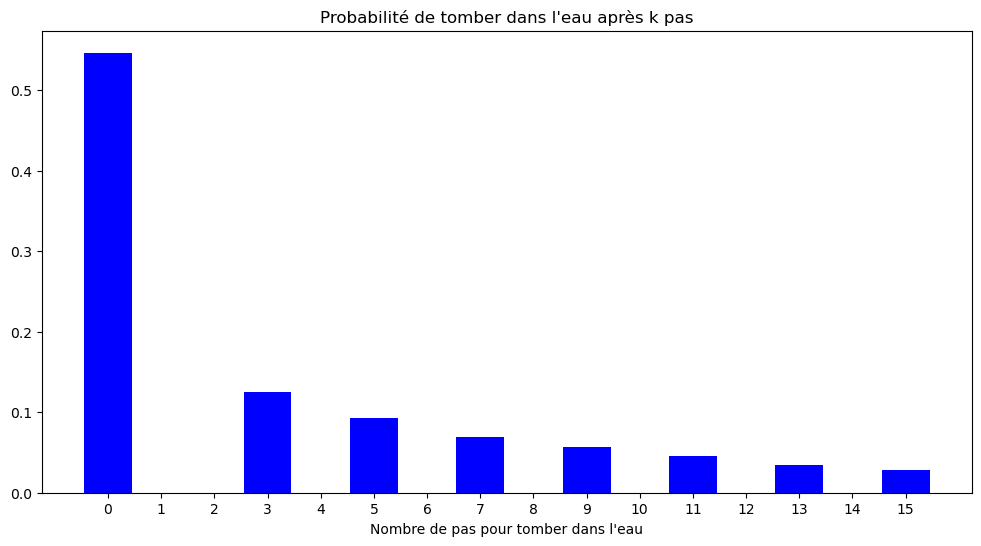

In [17]:
from numpy import *
from matplotlib.pyplot import *
import math

def tomber_eau_bis(longueur_rive):
    position = 0
    nb_pas = 0
    for i in range(longueur_rive):
        position += random.choice([-1,1])
        nb_pas += 1
        if position == 3:
            return nb_pas
    return 0
               
longueur_rive = 15
l_x = list(range(longueur_rive+1))
l_y = [0] * (longueur_rive+1)

nb_trajectoires = 20000
for _ in range(nb_trajectoires):
    nb_pas = tomber_eau_bis(longueur_rive)
    l_y[nb_pas] += 1

l_y = [y/nb_trajectoires for y in l_y]
print(l_y)
figure(figsize=(12, 6))
bar(l_x, l_y, color="blue", width=0.9)
title("Probabilité de tomber dans l'eau après k pas")
xlabel("Nombre de pas pour tomber dans l'eau")
xticks(range(longueur_rive+1))
show()